## Exercise 1  - Preference Assignment

We have $n$ objects, labeled $1,\dots, n$. Our goal is to assign a real valued rank $r_i$ to the objects. A *preference* is an ordered pair $(i,j)$, meaning that object $i$ is preferred over object $j$. The ranking $r\in \mathbb{R}^n$ and preference $(i,j)$ are *consistent* if $r_i \ge r_j +1$ (i.e. a gap of one in ranking is the threshold for preferring one item over another). We define the *preference violation* of preference $(i,j)$ with ranking $r\in\mathbb{R}^n$ as

$$
v = (r_j + 1 - r_i)_+ = \max\{r_j + 1 - r_i,0\}.
$$

We have a set of $m$ preferences among the objects, $(i^{(1)},j^{(1)})$, ..., $(i^{(m)},j^{(m)})$. We will select our ranking $r$ as a minimiser of the total preference violation penalty, defined as

$$
J = \sum_{k=1}^m \phi(v^{(k)}),
$$

where $v^{(k)}$ is the preference violation of $(i^{(k)},j^{(k)})$ with $r$, and $\phi$ is a nondecreasing convex penalty function that satisfies $\phi(u)=0$ for $u\le 0$.

*   (a) Consider the case where we want as many preferences as possible to be consistent with the ranking, but we can accept some (hopefully, few) larger preference violations. Which (simple) choice of $\phi$ will likely produce a solution that matches this criterion?
*   (b) Consider the case where we don't mind some small violations, but we really want to avoid large violations. Which (simple) choice of $\phi$ will likely produce a solution that matches this criterion?
*   (c) Find the rankings obtained using the penalty functions proposed in part (a) and (b), on the data set found at the bottom of this exercise.
*   (d) Plot a histogram (50 bins) of preference violations for each penalty function. How many more positive preference violations does the penalty function of (b) has than that of (a)? (Use `sum(v>0.001)` to determine this number.)
*   (e) Which penalty function has larger preference violations?






In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

### Data

In [ ]:
m = 1000
n = 50

pref = np.array([[40, 35, 46, 32, 47,  5, 28, 41, 34, 46,  3, 22, 46, 34, 32,  1,
         1, 41, 11, 37, 26, 32,  2, 43, 34, 45, 37, 14, 23, 27, 37, 38,
         5, 16, 17, 27,  1,  2, 44, 35, 41, 32, 48, 37, 35, 33, 19,  1,
        34, 22, 27, 36, 46, 45, 41, 19, 10, 41,  1, 40,  1, 36, 15, 38,
        37, 50,  1, 41, 14,  6, 44, 47, 41, 11, 20,  5, 34,  3, 38,  1,
        47,  7, 37, 28, 11,  9, 18,  5, 35, 18, 37,  7, 10,  1,  9, 47,
        13, 20, 18, 32,  2, 35, 12, 46, 45, 24, 34, 47, 20,  9, 37, 10,
        26, 38, 23, 14,  5,  7,  4, 40, 10,  5, 41, 37, 41,  7,  5, 39,
        41, 17, 47, 49, 36,  2, 17, 13,  9, 35, 41, 32,  5, 12, 17, 29,
        19,  5, 17, 46, 20,  1,  1, 20, 28, 11, 14, 17, 23, 23, 45,  9,
        20, 23, 13, 28, 34, 40,  3, 10, 32,  7, 20, 33, 37, 25,  3, 23,
        28, 22, 16, 18,  3,  1, 34, 35, 13, 48, 37, 28, 43, 36, 27, 48,
         1, 14,  1, 48, 12, 32, 12,  1,  6, 37, 49,  1, 49,  7, 43, 20,
        33, 13, 45, 29,  9, 14, 22, 20, 32, 20,  5, 34, 47, 19,  5, 49,
        13, 48, 17, 12, 46, 13, 14,  6, 24, 32, 45, 44,  7, 17,  9,  2,
         6, 13, 27,  7, 24,  7, 25, 37, 38, 13, 38, 47, 28, 34,  1,  5,
        13,  4, 43, 45, 45,  6, 39, 32, 18, 41, 33, 28, 12, 41, 36, 45,
        41,  4, 46, 41, 19,  6, 13,  4, 25, 14, 34,  1, 30, 14, 42, 11,
        35, 36,  3, 35, 23, 23, 37, 38, 10,  5, 38,  3, 20, 43,  3,  4,
        22, 40, 11,  7, 11, 40,  1, 20, 13, 42, 17,  1, 23, 47, 32, 33,
        34, 45, 36, 23, 28, 45, 20, 36, 26, 50, 25, 16,  9,  4, 14,  4,
         6, 17, 34,  5, 12,  7, 19, 16, 40,  8, 18, 18, 46,  9, 44, 32,
        17,  3, 12, 13, 43, 41, 12, 38, 13,  9,  7, 33,  3, 37,  8,  3,
         4, 43, 43, 31, 41, 40,  9, 45, 13, 10, 32, 20, 39, 11, 30,  2,
        28, 41, 21, 17,  7, 46, 25, 18,  6, 47, 19,  9, 49,  2, 13, 34,
        45,  1, 49, 16, 17, 48, 37, 37, 26, 14, 35, 46, 38, 47, 32, 30,
        34, 33, 22, 37, 40, 47, 32, 45, 38, 23, 40, 14, 37,  5, 22, 38,
        22, 14,  9,  5,  3, 35, 13, 12, 34, 20, 33, 23,  1, 33,  9,  1,
         7,  1, 40, 37, 10, 14, 11, 14, 43, 34,  3, 33, 46, 16, 28, 17,
        48,  1, 29, 26,  3, 36, 12, 13, 45, 32, 13, 20, 34, 39, 50,  2,
         5, 32, 10, 34, 19, 47, 37, 20, 35, 45, 40, 46,  5, 49, 46,  6,
         6, 26, 34, 12, 18,  1,  1, 28, 47, 45, 43, 18, 13, 19, 14, 21,
        20, 33, 34, 38, 44,  1, 18, 12, 40, 17, 14, 19, 48,  5, 17,  4,
        22,  9, 13, 40, 28,  4,  9, 45, 40, 26, 40, 37,  2,  4, 22, 45,
        33, 46,  3, 44, 37, 23,  5, 23, 20, 36, 41, 48, 20, 45, 45, 49,
        32, 10,  1,  6,  9, 18, 23, 18,  6, 40, 23,  6, 19, 46, 42, 13,
        44, 13, 40,  1,  6, 20, 40, 17, 28, 26, 16, 37, 25, 44, 17,  1,
        46, 41, 21,  4,  3, 40,  3, 33, 43, 43, 19, 49, 40, 11, 37, 45,
         1, 19, 12, 50, 37, 10, 29, 47, 41, 45, 23, 40, 45, 44, 16,  7,
         5, 14, 36, 17, 19, 20,  5, 43, 17, 35, 16, 17, 33,  1, 16, 36,
        18,  5, 36,  6, 45, 48, 23, 14, 42, 44, 37, 37, 25, 11, 43, 19,
        12, 44, 27, 33,  3, 32,  1, 34,  3, 47, 37, 18, 16, 13, 20, 44,
        19, 37, 18, 28, 13, 35,  6, 11,  9,  9, 22, 36, 26, 18, 47,  5,
         9, 48, 34, 20, 35,  1,  5,  1, 45, 42, 35, 25,  5, 18, 25, 41,
        28, 37,  9, 45, 48, 25,  1, 19,  7, 27,  1, 10,  7, 21,  7,  5,
         6, 49, 17, 18, 41, 19, 11, 16, 34, 49, 11, 30,  9, 17, 19, 16,
        38, 17, 46, 17, 30,  3, 12, 13, 35, 34, 32, 12, 10, 35, 37, 20,
        11, 14,  7, 49,  1, 12, 19, 23, 15, 10, 21, 12, 35,  3,  3, 12,
         2, 17, 37,  7, 21, 17, 48, 20, 35, 43,  3,  5, 18, 16, 13, 22,
        33,  5, 34, 35,  1, 23, 32,  1, 22, 12, 16, 19, 28, 14,  1, 11,
        20, 50, 15, 18, 12, 13, 43, 32,  5, 20,  4, 28, 43, 37, 17, 37,
        13, 35, 34, 23,  2, 41, 48, 36, 47, 44, 49,  9,  3, 29, 33, 32,
        39, 39,  7,  7, 35, 21,  5, 10,  5, 32, 41, 45, 16,  9,  7, 34,
         9, 18, 37, 44, 33, 34, 34,  4, 46, 41, 11, 34, 47, 34, 23,  7,
         1, 28, 37,  6, 39, 47, 17, 19, 48, 46, 19,  7, 19, 34, 17, 20,
        10, 47,  3, 39, 49,  1, 14,  1, 41, 14,  9,  6, 41, 42,  9, 12,
         6, 43, 32, 16, 23, 23,  9, 46, 18, 18, 40, 14,  1,  1, 49, 48,
        28, 35, 32,  9,  3, 16,  4, 44, 15, 34, 33, 48, 47, 23, 47, 37,
         9,  5, 13, 32,  4,  3, 31, 28, 11, 19, 35, 23,  9, 25, 14,  1,
        34, 44, 23, 32,  1, 28, 14, 38, 32, 33,  8,  3,  4, 29, 18, 41,
        34,  9,  6, 23, 14, 41,  6, 30, 16, 12, 44, 12,  7, 42, 30, 47,
        19,  6, 15, 30, 37,  3, 14, 41,  4, 12, 44,  8, 45, 46, 13,  7,
        49, 47, 45, 10,  7, 16, 40, 14],
       [ 7, 22, 50,  8, 26, 26, 10, 30, 21, 33, 44, 50,  8, 39, 48, 39,
        28, 31, 21, 42,  5, 30, 27, 46, 47, 44,  9, 23,  2, 31, 33, 31,
        10, 39, 50,  8, 49, 15, 48, 30, 10, 23, 50,  4, 36, 16, 38, 38,
        47, 25, 49, 19, 30, 22, 24, 21, 48,  9, 41, 48, 48, 31, 21, 10,
        49,  8, 35, 35, 15, 33, 26, 49, 31,  2, 47, 11,  7,  4, 46, 26,
        10, 26, 34, 46, 16, 28, 33, 12, 49, 25, 21, 21, 19, 32, 26,  2,
        30, 21, 12, 28,  5, 21,  7, 48, 31, 36,  3, 21, 18, 29, 24, 21,
        40, 30, 15, 28, 42, 31, 36, 24, 31, 43, 45, 26, 27, 33, 30, 31,
        27, 31, 29, 27, 26, 42, 26, 49, 15, 29,  3, 42, 27, 11, 34, 39,
         8, 50, 12, 30, 40, 17, 45, 11,  9, 15, 41,  2, 16, 14,  4,  8,
        38, 11, 28, 39, 14, 11, 30, 49, 27, 26,  4, 10,  9, 49, 27, 27,
        10, 31, 50, 14, 30,  3, 35, 21, 25, 21, 32, 24, 44, 42, 10, 29,
        10, 26, 11,  2, 28, 33, 44, 33, 42, 38, 31, 24, 29, 24, 16, 42,
        21,  9, 11, 26, 40,  8, 15, 22, 48, 45, 39, 41, 49, 39, 29, 44,
         2, 34, 38,  4,  2, 24, 24, 29, 12, 38, 22, 37, 16, 44, 38, 30,
        25, 25, 13, 50, 13, 10,  5, 10, 22, 23, 33, 15, 16, 12, 40, 21,
        50,  5,  4,  1, 32, 20, 27, 35,  9,  8, 49,  7, 48, 29, 30,  4,
        32, 48, 33,  8, 16, 28, 10, 40, 16,  8, 42, 19, 31, 50, 12, 33,
        33, 39, 21, 50, 26, 44, 32,  2, 21, 10,  2, 50, 31, 20, 29, 27,
         8, 29,  8, 31, 42, 36, 15,  7,  2, 36, 49, 22, 12, 13, 43, 37,
        33,  6, 50,  4, 43, 31, 43, 39,  3, 42,  1, 22, 16, 22,  4, 29,
         3, 48, 28, 45, 16, 29, 24, 27, 44, 50, 32, 20, 22, 47, 27, 13,
        19, 19, 28, 28, 44, 10, 24,  7, 41, 26, 29, 32, 33, 12, 28,  7,
        48, 26, 35,  5, 33, 11, 12, 23, 29, 39, 24,  6, 24, 21, 31, 26,
        16,  9, 45, 37, 30, 25,  1, 37,  2,  8, 16,  2, 39, 47, 19, 23,
        25, 28, 33, 29, 23, 29, 50, 29, 49,  8, 36, 31, 15, 46,  4, 50,
        15, 14, 15, 45, 21, 38, 48, 14,  8,  3, 22, 44, 47, 44, 42, 20,
        39, 19, 16, 33, 37, 39, 25, 41,  3, 14, 49, 19, 39, 25, 23, 50,
        31, 12, 15, 19, 24, 16,  8,  4, 36, 44,  7,  8, 40, 27,  2, 31,
        15,  2, 39,  7, 27, 21, 35, 10, 36, 31, 31,  7, 47, 49, 39, 25,
        22, 16, 19, 49, 49, 19, 29, 15, 31, 49, 29, 16, 29, 25, 50, 24,
        35, 30, 13, 39, 24, 32, 36, 35, 44,  8, 35, 35, 35, 15, 27,  5,
         4, 26, 42, 46, 15, 41, 11,  7, 10, 13, 33, 16, 42, 12, 11, 25,
        24, 27, 15, 50, 49, 17, 29, 21,  2, 39,  2, 49, 12, 27,  8, 50,
        19, 15, 30, 15, 36, 32, 40, 15, 28,  8, 44, 24, 41, 35, 47, 12,
        39, 21, 41, 47, 50, 12, 46, 49, 16, 50, 16, 16, 48, 19,  8, 27,
        31, 12, 48, 13, 42, 32, 22,  4, 50, 42, 39, 39, 36, 24, 49, 44,
        43, 18, 13, 24, 24, 16, 15, 42, 19, 42,  2, 42, 11,  3, 40, 18,
        36,  2, 48, 39, 48, 21, 26, 38, 16, 42, 29, 16, 50, 15,  7, 21,
        39, 10, 39, 40, 27, 25, 48, 40,  5, 26, 42,  9, 39, 46, 27, 17,
        16, 23, 49,  7, 48, 18, 26, 25, 23, 42, 41, 24, 24,  3, 50, 30,
         8, 31, 15, 15, 21, 44, 25, 10,  2, 44, 44, 42, 50, 36,  8, 48,
         2, 41,  8, 44, 32, 25, 32, 49, 39, 33, 49, 11, 25, 31, 42, 45,
        47, 50, 48, 19, 26, 42, 42, 35, 36, 48, 19, 43, 40, 21,  1, 21,
        48, 43, 32, 21,  2, 21, 49, 26, 27,  3, 32, 15, 43, 42, 30, 49,
        10, 30, 45, 37, 42, 49, 10, 21,  4, 42, 29, 23, 14, 35, 31, 22,
        21, 33, 33,  4, 24, 23, 11, 20, 33, 50,  8, 50, 31, 30, 30, 26,
        24, 10, 17, 31, 21, 19, 29, 36, 26, 31, 38,  7, 21, 48, 30, 38,
        39, 22, 33, 36, 34, 24, 25, 50, 42, 15, 22, 42, 46, 40, 20, 24,
        29, 26, 36, 29, 10, 11, 42,  8, 31, 33, 41, 31, 16, 30, 24, 48,
        31, 15,  8, 11, 15, 33, 30, 36, 41, 24, 49, 50, 36,  6, 41, 39,
         7, 21, 11,  4,  9, 23, 25, 24, 46, 25, 32, 23, 31, 27, 48,  1,
        27, 50, 15, 49, 21, 42, 41, 22,  3, 43, 30, 34, 44, 42, 25, 23,
         3, 10, 45, 30, 34, 29,  5, 29, 15,  8,  3, 36, 48, 26, 21, 31,
        27, 29, 19, 35, 34, 25, 29, 22, 22, 24, 25, 36, 31, 32, 47, 32,
        22, 19, 35, 22, 41, 32, 44, 42, 44, 40, 15, 11, 42, 34, 44, 19,
        42, 24, 21, 39, 29, 16, 25, 27, 20, 17, 46, 24,  9, 25, 15, 21,
        38, 39, 33, 10, 35, 50, 24, 17, 31, 21, 27, 32, 50, 15, 26, 39,
        19, 25, 25, 22, 10, 44, 18, 19, 28, 25, 30, 48, 16,  8, 22, 41,
         3, 30,  9,  2, 11, 37, 38, 42, 42, 25, 24,  4, 39, 25, 20, 47,
        15,  4, 22, 48, 48, 49, 32, 50, 45, 36, 50, 16, 48,  8, 42, 43,
        30, 26, 24, 15,  4, 38, 26, 11, 42, 32, 20, 24, 29, 25, 50, 19,
        30,  4, 19, 48, 48, 27, 21, 47]]).T

### Solution Exercise 1

For the first case (a), we take a
linear penalty (for positive violations): $\phi(u) = u_+$. For the second case (b), we take a quadratic penalty (for positive violation): $\phi(u) = u_+^2$. If the violations were two-sided, these would correspond to an $\ell_1$ norm and a squared $\ell_2$ norm, respectively.

We now solve the problem.

In [ ]:
#We define the variables
r_a = cp.Variable(n)
r_b = cp.Variable(n)

In [ ]:
# We compute the objective functions
Violation_a = 0
Violation_b = 0
for k in range(m):
  Violation_a = Violation_a + cp.maximum(r_a[pref[k,1]-1] + 1 - r_a[pref[k,0]-1],0)
  Violation_b = Violation_b + cp.square(cp.maximum(r_b[pref[k,1]-1] + 1 - r_b[pref[k,0]-1],0))

In [ ]:
# and solve problem a
prob_a = cp.Problem(cp.Minimize(Violation_a))
prob_a.solve()

387.00000000152227

In [ ]:
# and problem b
prob_b = cp.Problem(cp.Minimize(Violation_b))
prob_b.solve()

523.0154272199974

In [ ]:
# We compute the violations
v_a = np.zeros(m)
v_b = np.zeros(m)
for k in range(m):
  v_a[k] = max(r_a.value[pref[k,1]-1] + 1 - r_a.value[pref[k,0]-1],0)
  v_b[k] = max(r_b.value[pref[k,1]-1] + 1 - r_b.value[pref[k,0]-1],0)

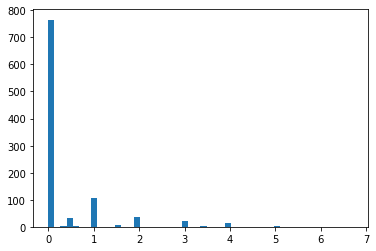

In [ ]:
# and plot them in a histogram with 50 bins for a
plt.hist(v_a, 50)
plt.show()

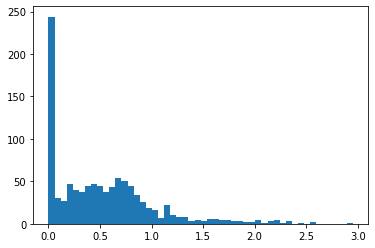

In [ ]:
# and plot them in a histogram with 50 bins for b
plt.hist(v_b, 50)
plt.show()

In [ ]:
print("Additional positive preference violations of (b):",sum(v_b>0.001) - sum(v_a>0.001))

Additional positive preference violations of (b): 546
